# Pipe Detection - Test using OpenCV

Install all the required packages.

In [102]:
pip install opencv-python

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


## Code

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [236]:
def count_pipes (image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (11, 11), 0)
    canny = cv2.Canny(blur, 30, 150, 3)
    dilated = cv2.dilate(canny, (1,1), iterations=2)
    (contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    hierarchy = hierarchy[0]
    
    # Ref -- https://www.authentise.com/post/detecting-circular-shapes-using-contours
    contour_list = []
    for i, contour in enumerate(contours):
        if not (hierarchy[i][2] < 0 and hierarchy[i][3] < 0):
            arc = cv2.arcLength(contour,True)
            approx = cv2.approxPolyDP(contour,0.01*arc,True)
            area = cv2.contourArea(contour)
            ## TODO: Add more conditions to make the contor selection better and better
            if ((len(approx) > 9) and (arc < 600) and (area > 30)):
                # print(contour)
                contour_list.append(contour)

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.drawContours(rgb, contour_list, -1, (255, 0, 0), 2)
    return (len(contour_list), rgb)


total pipes 57


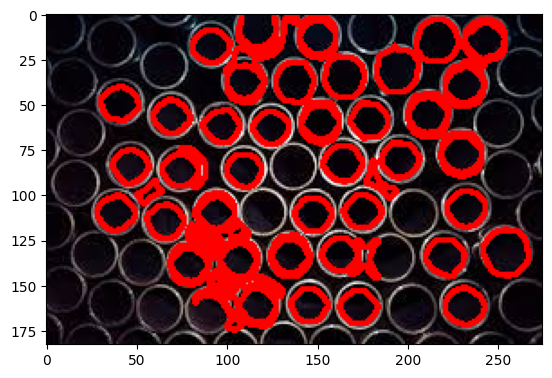

In [237]:
(count, tagged_img) = count_pipes('image3.jpeg')
print("total pipes", count)
plt.imshow(tagged_img)

total pipes 7


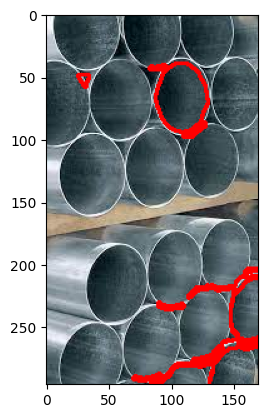

In [238]:
(count, tagged_img) = count_pipes('image4.jpeg')
print("total pipes", count)
plt.imshow(tagged_img)

total pipes 33


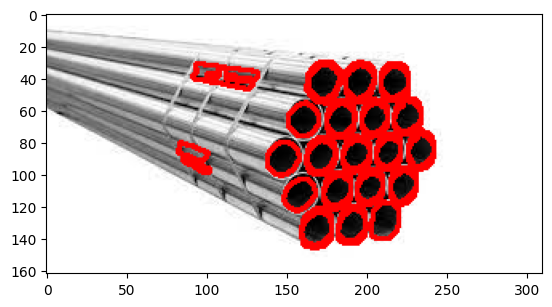

In [239]:
(count, tagged_img) = count_pipes('image5.jpeg')
print("total pipes", count)
plt.imshow(tagged_img)

total pipes 77


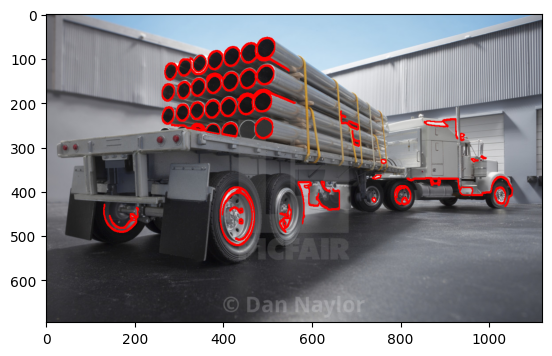

In [240]:
(count, tagged_img) = count_pipes('image2.jpg')
print("total pipes", count)
plt.imshow(tagged_img)

total pipes 134


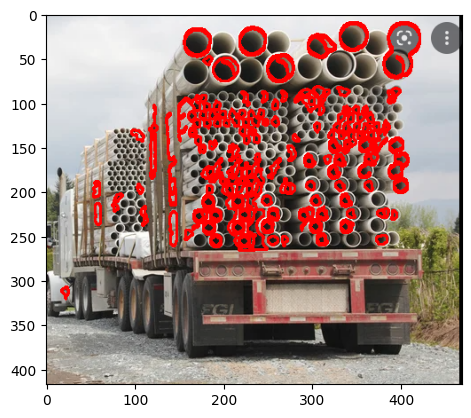

In [241]:
(count, tagged_img) = count_pipes('image.png')
print("total pipes", count)
plt.imshow(tagged_img)

total pipes 124


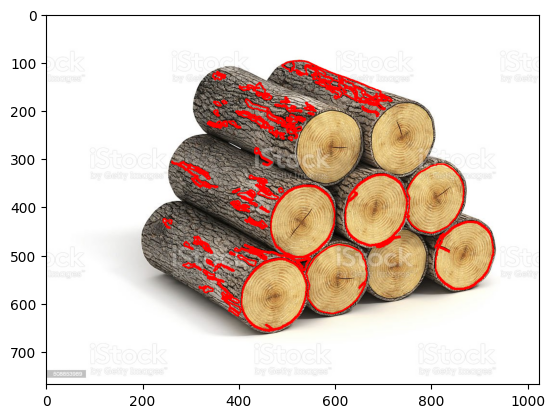

In [243]:
(count, tagged_img) = count_pipes('log2.jpg')
print("total pipes", count)
plt.imshow(tagged_img)